In [1]:
import sympy as sy
import matplotlib as plt
from numpy import array, arange, append,linspace,zeros,sign,polyfit,flipud,diff,histogram,exp,pi
from IPython.display import Latex 
#in case we want interactivity
from IPython.html.widgets import interactive 
%pylab inline --no-import-all 

/Users/schultzk/anaconda/lib/python2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)

Populating the interactive namespace from numpy and matplotlib


pylab import has clobbered these variables: ['plt']
`%matplotlib` prevents importing * from pylab and numpy


In [2]:
#Declare bond lengths. In this case a fully connected 6 bond graph with no loops. And the wave number k 
# All of this follows the following paper: http://arxiv.org/abs/nlin/0207049

sy.var('AB AC AD BC BD CD k')

(AB, AC, AD, BC, BD, CD, k)

In [3]:

C=sy.Matrix([[0,2,2,2],[2,0,2,2],[2,2,0,2],[2,0,2,0]]) #Define the Connectivity Matrix
L=sy.Matrix([[0,AB,AC,AD],[AB,0,BC,BD],[AC,BC,0,CD],[AD,BD,CD,0]]) #Define the Metric Matrix

In [4]:
C

Matrix([
[0, 2, 2, 2],
[2, 0, 2, 2],
[2, 2, 0, 2],
[2, 0, 2, 0]])

In [5]:
lengths=[(AB,100.8),(AC,88.3),(AD,89.1),(BC,128.3),(BD,66.55),(CD,59.3)] #Define the actual lengths

In [6]:
#Create the solution matrix. Taking the determinent of this and setting it equal to zero will give us our
#Eigenenergies
h=sy.zeros(4,4)

for i in range(4):
    for j in range(4):
        if i==j:
            for l in range(4):
                if l!=i:
                    if L[i,l]!=0:
                        h[i,j]=h[i,j]-C[i,l]/sy.tan(k*L[i,l])     
        else:
            if L[i,j]==0:
                h[i,j]=0
            else:
                h[i,j]=C[i,j]/sy.sin(k*L[i,j])

In [7]:
h

Matrix([
[-2/tan(AD*k) - 2/tan(AC*k) - 2/tan(AB*k),                              2/sin(AB*k),                              2/sin(AC*k),                2/sin(AD*k)],
[                             2/sin(AB*k), -2/tan(BD*k) - 2/tan(BC*k) - 2/tan(AB*k),                              2/sin(BC*k),                2/sin(BD*k)],
[                             2/sin(AC*k),                              2/sin(BC*k), -2/tan(CD*k) - 2/tan(BC*k) - 2/tan(AC*k),                2/sin(CD*k)],
[                             2/sin(AD*k),                                        0,                              2/sin(CD*k), -2/tan(CD*k) - 2/tan(AD*k)]])

In [8]:
p=sy.det(h) #take the determinant and see what it looks like
print p

16/(tan(AD*k)*tan(BD*k)*tan(CD*k)**2) + 16/(tan(AD*k)*tan(BC*k)*tan(CD*k)**2) + 16/(tan(AD*k)*tan(BC*k)*tan(BD*k)*tan(CD*k)) + 16/(tan(AD*k)*tan(BC*k)**2*tan(CD*k)) + 16/(tan(AD*k)**2*tan(BD*k)*tan(CD*k)) + 16/(tan(AD*k)**2*tan(BC*k)*tan(CD*k)) + 16/(tan(AD*k)**2*tan(BC*k)*tan(BD*k)) + 16/(tan(AD*k)**2*tan(BC*k)**2) + 16/(tan(AC*k)*tan(BD*k)*tan(CD*k)**2) + 16/(tan(AC*k)*tan(BC*k)*tan(CD*k)**2) + 16/(tan(AC*k)*tan(BC*k)*tan(BD*k)*tan(CD*k)) + 16/(tan(AC*k)*tan(BC*k)**2*tan(CD*k)) + 32/(tan(AC*k)*tan(AD*k)*tan(BD*k)*tan(CD*k)) + 32/(tan(AC*k)*tan(AD*k)*tan(BC*k)*tan(CD*k)) + 16/(tan(AC*k)*tan(AD*k)*tan(BC*k)*tan(BD*k)) + 16/(tan(AC*k)*tan(AD*k)*tan(BC*k)**2) + 16/(tan(AC*k)*tan(AD*k)**2*tan(BD*k)) + 16/(tan(AC*k)*tan(AD*k)**2*tan(BC*k)) + 16/(tan(AC*k)**2*tan(BD*k)*tan(CD*k)) + 16/(tan(AC*k)**2*tan(BC*k)*tan(CD*k)) + 16/(tan(AC*k)**2*tan(AD*k)*tan(BD*k)) + 16/(tan(AC*k)**2*tan(AD*k)*tan(BC*k)) + 16/(tan(AB*k)*tan(BD*k)*tan(CD*k)**2) + 16/(tan(AB*k)*tan(BC*k)*tan(CD*k)**2) + 16/(tan(AB*k

/Users/schultzk/anaconda/lib/python2.7/site-packages/matplotlib/collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


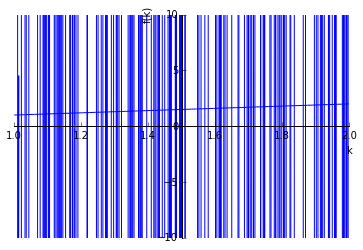

In [9]:
# plot to find where first eigenvalue is. 
sy.plotting.plot(p.subs(lengths),k,(k,1,2),ylim=(-10,10))

In [10]:
def find_roots(start,stop,step,p):
    """
    start is start of search
    stop is stop of search
    step is step size of search
    p is the determinat of h(k)
    
    We will localize the zeros by looking for intervals where there is a sign change
    """
    Lp=sy.lambdify(k, p) #make p into an "array-like" thing
    root=array([],dtype=float) #array to store even solutions 
    exception=0 #keep track of exceptions, which in this case are poles
    inc=arange(start,stop,step) #array of "x"s to find solutions

            
    for i in range(len(inc)-1):
   
            if Lp(inc[i])*Lp(inc[i+1])<0: #have we bracketed a zero?
                
                #yes? then find it. I
                print inc[i],inc[i+1] #just to keep an eye on things as we go along
                try:
                    #sy.mpmath.findroot uses an mpf data-type, this is not easily converted as an array
                    #so convert to float as we go, so we can use numpy routines later.
                    root=append(root,float(sy.mpmath.findroot(Lp, (inc[i], inc[i+1]),tol=0.0000001, solver='anderson')) ) 
                except ValueError:
                    #ValueErrors in this application tend to be places where det(h(k)) blows up. Using the
                    #try-except formalism allows us to skip over the poles and go back to finding zeros.
                    #
                    exception=exception+1
                    
    print "nummber of poles %d " %exception
    print "number of roots %d "%len(root)
    return root
                

In [ ]:
sy.dps=30
roots=find_roots(.013,10,.0000001,p.subs(lengths)) #this can take a loooong time!

0.0190463 0.0190464
0.0208314 0.0208315
0.0244862999999 0.0244863999999
0.0249347999999

In [147]:
def RMT_Staircase(eigs):
    """Takes eigs currently gotten from Quantum Graph Spectrum Generator.ipyn for Quantum Graph Stuff and creates
    %staircase. Returns cuml (staircase) and Energy which is used to create
    %cuml
    %Changed on 3/28/14 to only need eigs, if this doesn't work replace num_eng
    %in function and send length(eigs)
    """
    min_eig=min(eigs)
    num_eng=len(eigs)
    max_eig=max(eigs)
    Energy=linspace(min_eig,max_eig,num_eng)
    cuml=zeros(len(Energy))
    for idx in range(len(Energy)):
        for j in range(len(eigs)):
            cuml[idx]=cuml[idx]+0.5*(sign(Energy[idx]-eigs[j])+1)

    plt.step(Energy,cuml,label='Integrated Density of States')
    plt.xlabel('Energy (cm-1)')
    plt.legend()
    return (Energy, cuml)

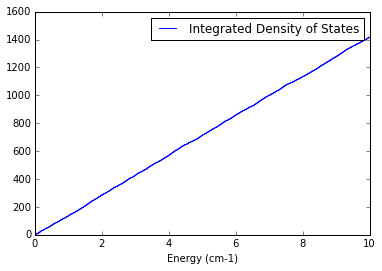

In [148]:
Energy, cuml=RMT_Staircase(roots)

In [149]:
coeff=polyfit(Energy,cuml,1)
print coeff

[ 142.42116954   -2.0938873 ]


In [150]:
def Smooth(coeff,Energy,cuml):
    """%set up variables dNdE and smooth
    %Smooth is an array with the smooth part of staircase function gotten from
    %running RMT_Staircase_func.m and fitting to a third order polynomial. 
    %dNdE is the derivative of the smooth part of staircase and is used in
    %unfolding in RMY_NNS.m
    """

    dNdE=zeros(len(Energy))  
    smooth=zeros(len(Energy));
    order=len(coeff) #get order of fit polynomial should be first, but just in case
    coeff=flipud(coeff) #reverse coeff to make it easier to create smooth
    for idx in range(len(Energy)):
        for jdx in range(len(coeff)):
            power=jdx
           
            smooth[idx]=smooth[idx]+coeff[jdx]*pow(Energy[idx],power)   
        
    plt.plot(Energy,smooth,label='smooth Integrated Density of states')
    plt.plot(Energy,cuml,label='Integrated Density of States')
    plt.xlabel('Energy (cm-1)')
    plt.legend()
    dE=Energy[2]-Energy[1];
    dNdE=diff(smooth)/dE
    return (dNdE,smooth)

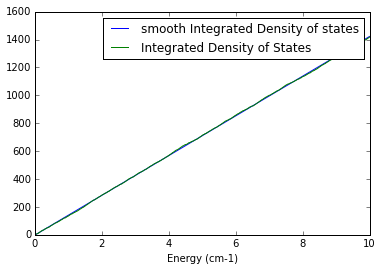

In [151]:
dNdE,smooth=Smooth(coeff,Energy,cuml)

In [152]:
def RMT_NNS(dNdE,eigs,bins):
    diffs=zeros(len(eigs))
     

    diffs=diff(eigs)*dNdE #see Vaa paper

    
    f,x=histogram(diffs,bins,density=True)
    fig, axes = plt.subplots(1, 1)
    #t=trapz(x,f)
    axes.hist(diffs,bins,normed=1,label="Number of states: %d"%len(eigs)) #%normalize histogram
    
    axes.plot(x,exp(-x),'r',label="Poisson") #%Poisson stats
    axes.plot(x,pi/2.*x*exp(-pi/4*x**2),label="GOE") #%GOE stats
    axes.set_xlabel("scaled spacing")
    axes.legend()

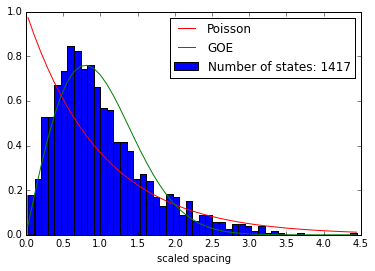

In [154]:
RMT_NNS(dNdE,roots,50)

In [122]:
freqs=roots*343/2/pi

In [128]:
from numpy import ones

<Container object of 713 artists>

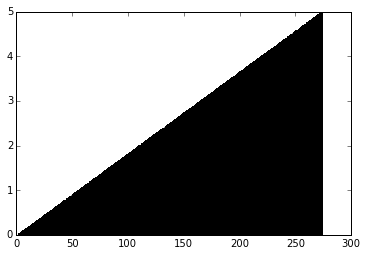

In [133]:
plt.bar(freqs,roots)

In [134]:
freqs[-1]

272.87646751040518

In [135]:
freqs[0]

1.0397407188320176

In [136]:
len(freqs)

713

In [144]:
matchingVals = filter(lambda x : x>12 and x<115, freqs)

In [145]:
len(matchingVals)

267